In [ ]:
df=pd.read_csv('C:/Users/arnav/Desktop/Python_projects/EDA/Rainfall_prediction/guwahati_weather_1972_2024.csv')
print(df.head())
print(df.tail())

       name    datetime  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
0  guwahati  1973-01-01     23.1     11.1  16.6          23.1          11.1   
1  guwahati  1973-01-02     22.1     10.1  16.2          22.1          10.1   
2  guwahati  1973-01-03     22.1     11.1  16.4          22.1          11.1   
3  guwahati  1973-01-04     23.1     16.1  20.1          23.1          16.1   
4  guwahati  1973-01-05     20.1     12.1  16.0          20.1          12.1   

   feelslike   dew  humidity  ...  severerisk              sunrise  \
0       16.6  10.2      69.7  ...         NaN  1973-01-01T06:10:36   
1       16.2  12.0      78.7  ...         NaN  1973-01-02T06:10:52   
2       16.4  11.5      75.4  ...         NaN  1973-01-03T06:11:07   
3       20.1  13.4      67.1  ...         NaN  1973-01-04T06:11:21   
4       16.0  13.5      85.7  ...         NaN  1973-01-05T06:11:33   

                sunset moonphase        conditions  \
0  1973-01-01T16:42:25      0.89             Clear

C:\Users\arnav\AppData\Local\Temp\ipykernel_9640\1558800975.py:1: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('C:/Users/arnav/Desktop/Python_projects/EDA/Rainfall_prediction/guwahati_weather_1972_2024.csv')


In [19]:
df_rel=df[['datetime','tempmax','tempmin','dew','humidity','precip','windspeed','sealevelpressure','cloudcover']]
df_rel.isnull().sum()

datetime             0
tempmax             46
tempmin             46
dew                 46
humidity            46
precip              47
windspeed            0
sealevelpressure    51
cloudcover          47
dtype: int64

In [32]:
df_rel=df_rel.dropna(subset=['precip'])
clean=['tempmax','tempmin','dew','humidity','sealevelpressure','cloudcover']
df_rel[clean]=df_rel[clean].interpolate(method='linear')
df_rel.isnull().sum()
df_rel.to_csv('guwahati_weather_1972_2025_clean.csv', index=False)



In [42]:
df_clean=pd.read_csv('C:/Users/arnav/Desktop/Python_projects/EDA/Rainfall_prediction/guwahati_weather_1972_2025_clean.csv')
df_clean.info()
df_clean.describe()
df_clean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18978 entries, 0 to 18977
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          18978 non-null  object 
 1   tempmax           18978 non-null  float64
 2   tempmin           18978 non-null  float64
 3   dew               18978 non-null  float64
 4   humidity          18978 non-null  float64
 5   precip            18978 non-null  float64
 6   windspeed         18978 non-null  float64
 7   sealevelpressure  18978 non-null  float64
 8   cloudcover        18978 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


,datetime,tempmax,tempmin,dew,humidity,precip,windspeed,sealevelpressure,cloudcover
0,1973-01-01,23.1,11.1,10.2,69.7,0.0,9.0,1015.0,5.5
1,1973-01-02,22.1,10.1,12.0,78.7,0.0,9.0,1014.2,0.9
2,1973-01-03,22.1,11.1,11.5,75.4,0.0,5.4,1013.4,26.1
3,1973-01-04,23.1,16.1,13.4,67.1,0.0,7.2,1014.3,40.0
4,1973-01-05,20.1,12.1,13.5,85.7,0.0,0.1,1016.2,30.0
...,...,...,...,...,...,...,...,...,...
18973,2025-01-28,23.8,14.5,15.3,81.1,0.0,8.5,1012.3,56.4
18974,2025-01-29,23.7,15.9,15.4,79.8,0.0,7.6,1014.6,56.8
18975,2025-01-30,23.6,13.4,13.8,78.9,0.0,9.9,1010.7,52.4
18976,2025-01-31,23.9,13.5,15.0,80.9,0.0,12.4,1011.1,55.8


In [48]:
df_clean['datetime'] = pd.to_datetime(df_clean['datetime'])
df_clean['year']=df_clean['datetime'].dt.year
df_clean['month']=df_clean['datetime'].dt.month
df_clean['day']=df_clean['datetime'].dt.day
df_clean.info()
df_clean['precip'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18978 entries, 0 to 18977
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   datetime          18978 non-null  datetime64[ns]
 1   tempmax           18978 non-null  float64       
 2   tempmin           18978 non-null  float64       
 3   dew               18978 non-null  float64       
 4   humidity          18978 non-null  float64       
 5   precip            18978 non-null  float64       
 6   windspeed         18978 non-null  float64       
 7   sealevelpressure  18978 non-null  float64       
 8   cloudcover        18978 non-null  float64       
 9   year              18978 non-null  int32         
 10  month             18978 non-null  int32         
 11  day               18978 non-null  int32         
dtypes: datetime64[ns](1), float64(8), int32(3)
memory usage: 1.5 MB


count    18978.000000
mean         4.894762
std         14.772484
min          0.000000
25%          0.000000
50%          0.000000
75%          2.106000
max        387.800000
Name: precip, dtype: float64

<Axes: xlabel='precip', ylabel='Count'>

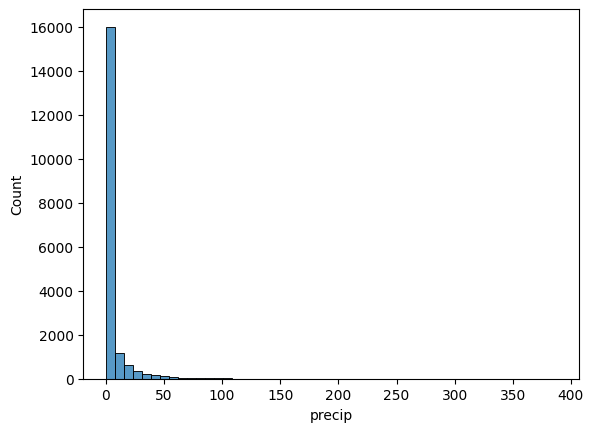

In [51]:
import seaborn as sns
sns.histplot(df_clean['precip'],bins=50)


<Axes: xlabel='month', ylabel='precip'>

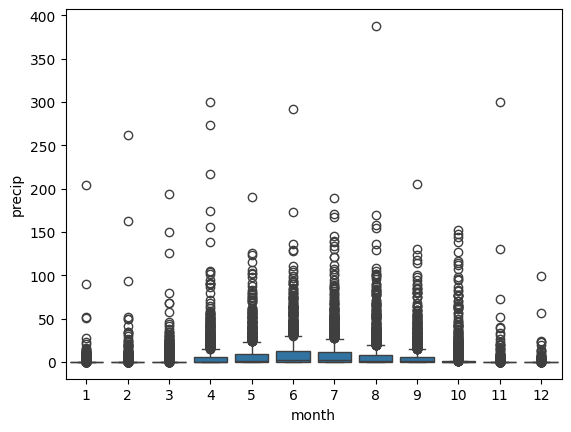

In [52]:
sns.boxplot(x='month',y='precip',data=df_clean)

<Axes: xlabel='tempmax', ylabel='precip'>

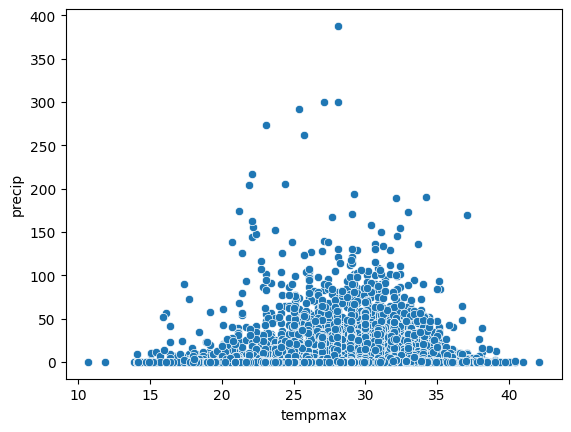

In [57]:
sns.scatterplot(x='tempmax',y='precip',data=df_clean)

<Axes: xlabel='dew', ylabel='precip'>

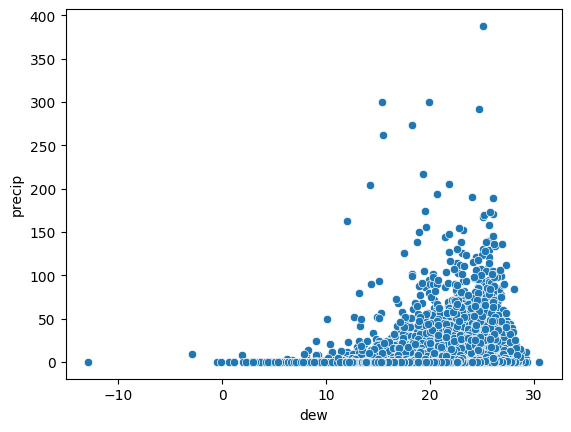

In [ ]:
sns.scatterplot(x='dew',y='precip',data=df_clean)

<Axes: xlabel='humidity', ylabel='precip'>

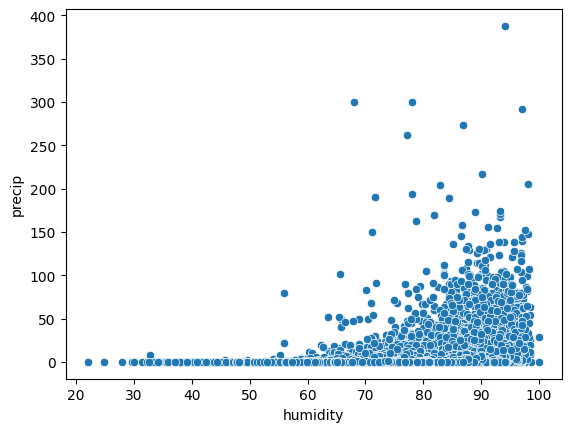

In [59]:
sns.scatterplot(x='humidity',y='precip',data=df_clean)

<Axes: xlabel='sealevelpressure', ylabel='precip'>

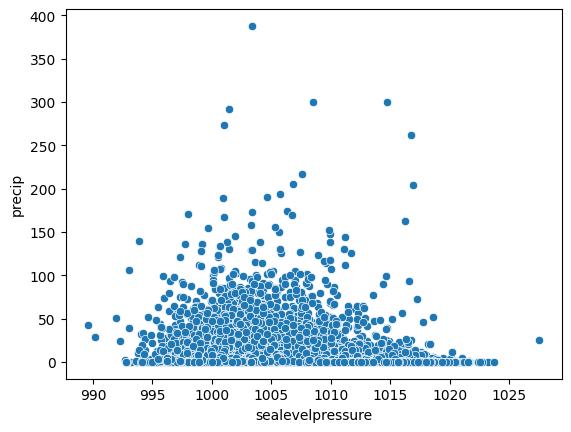

In [60]:
sns.scatterplot(x='sealevelpressure',y='precip',data=df_clean)

<Axes: xlabel='tempmin', ylabel='precip'>

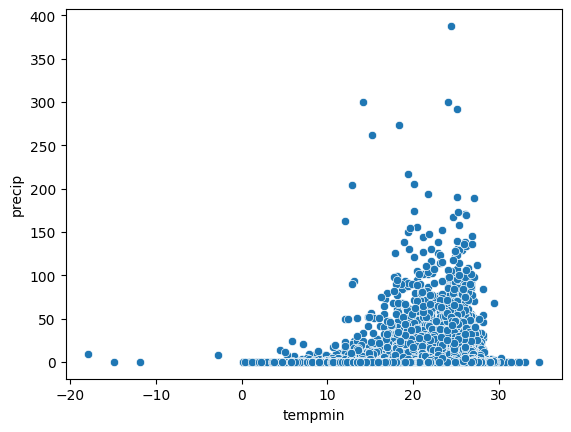

In [61]:
sns.scatterplot(x='tempmin',y='precip',data=df_clean)

<Axes: xlabel='windspeed', ylabel='precip'>

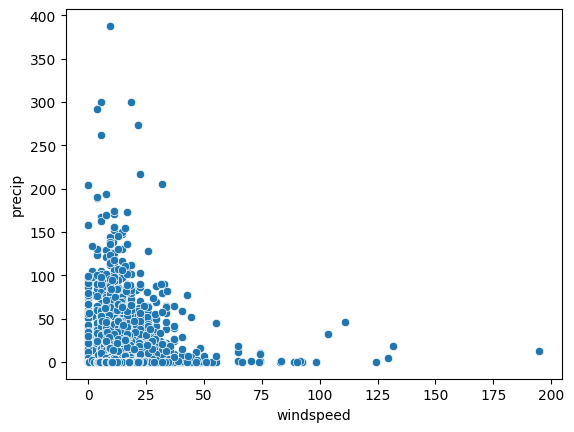

In [62]:
sns.scatterplot(x='windspeed',y='precip',data=df_clean)

<Axes: xlabel='cloudcover', ylabel='precip'>

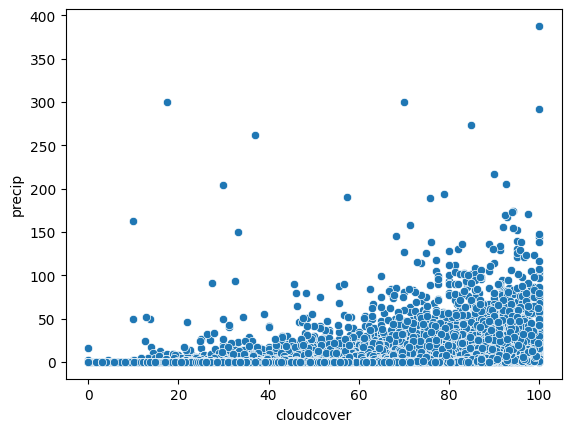

In [63]:
sns.scatterplot(x='cloudcover',y='precip',data=df_clean)

<Axes: >

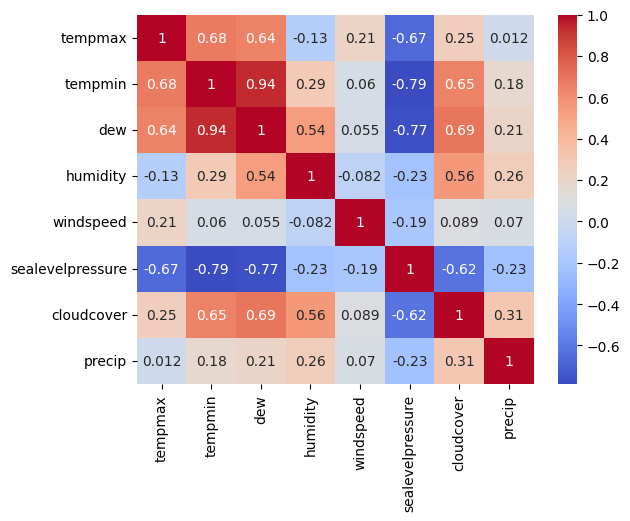

In [64]:
corr = df[['tempmax','tempmin','dew','humidity','windspeed','sealevelpressure','cloudcover','precip']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
